# Unsupervised Learning
2-Dimensional

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


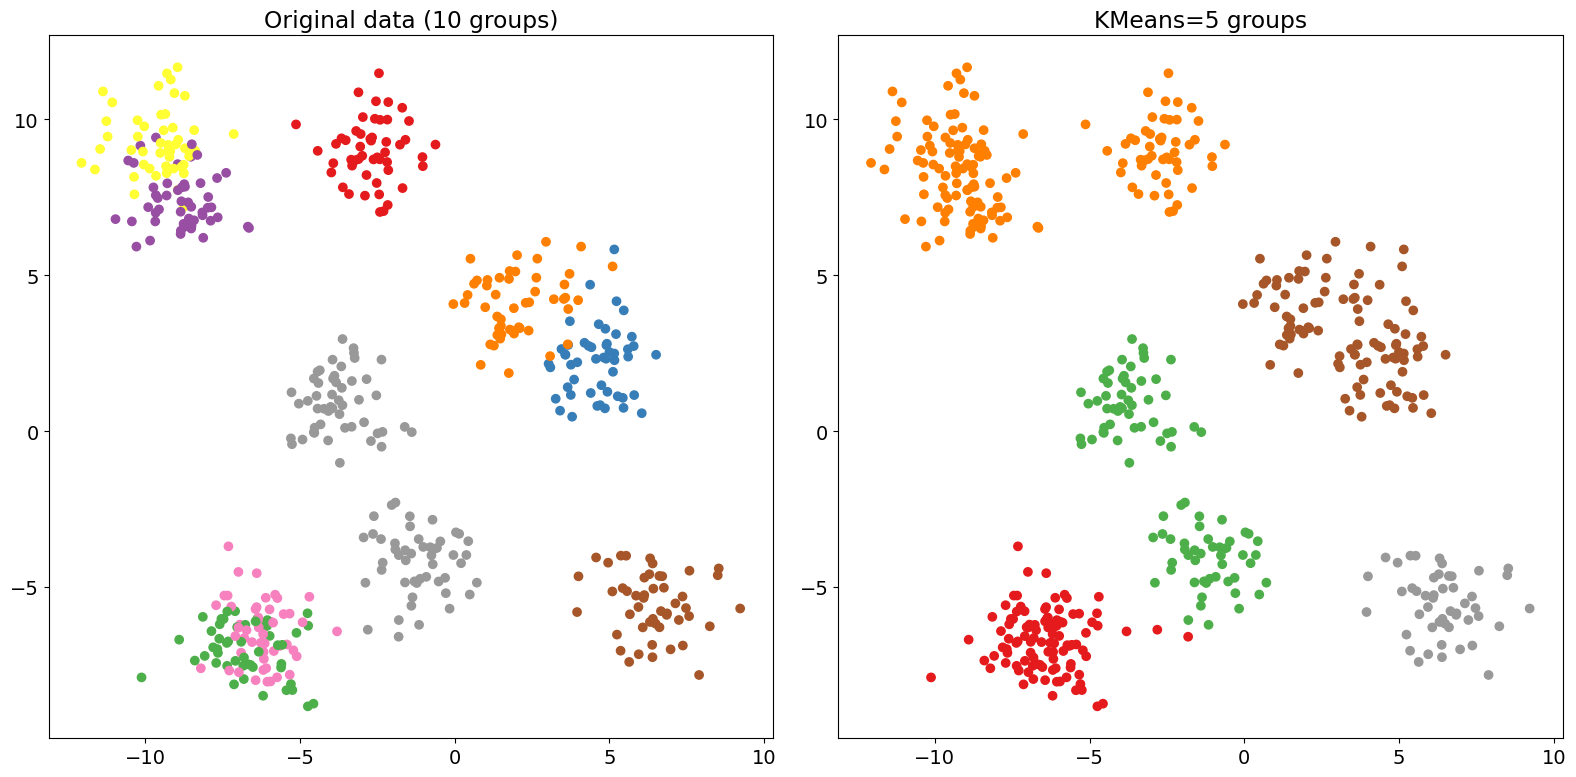

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Randomly generate 10 groups of data with 2 features, a total of 500 items (dy is the original target value label 0~9)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=10, random_state=42)

# Use KMeans to find 5 groups in the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(dx)

# Predict new labels
new_dy = kmeans.predict(dx)

plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.title('Original data (10 groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)

plt.subplot(122)
plt.title('KMeans=5 groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)

plt.tight_layout()
plt.show()

3-Dimensional

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


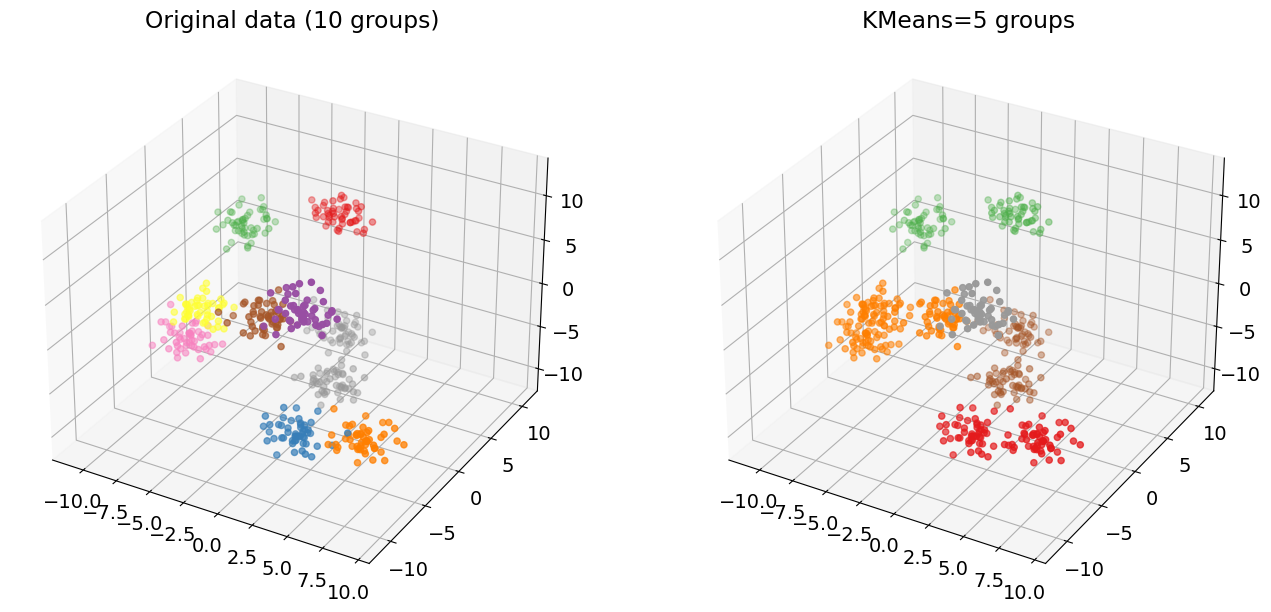

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

dx, dy = make_blobs(n_samples=500, n_features=3, centers=10, random_state=42)

kmeans = KMeans(n_clusters=5)
kmeans.fit(dx)
new_dy = kmeans.predict(dx)

plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
plt.title('Original data (10 groups)')
ax.scatter(dx.T[0], dx.T[1], dx.T[2], c=dy, cmap=plt.cm.Set1)
ax = fig.add_subplot(122, projection='3d')
plt.title('KMeans=5 groups')
ax.scatter(dx.T[0], dx.T[1], dx.T[2], c=new_dy, cmap=plt.cm.Set1)
plt.show()

# How to Choose $K$
- Elbow method
- silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

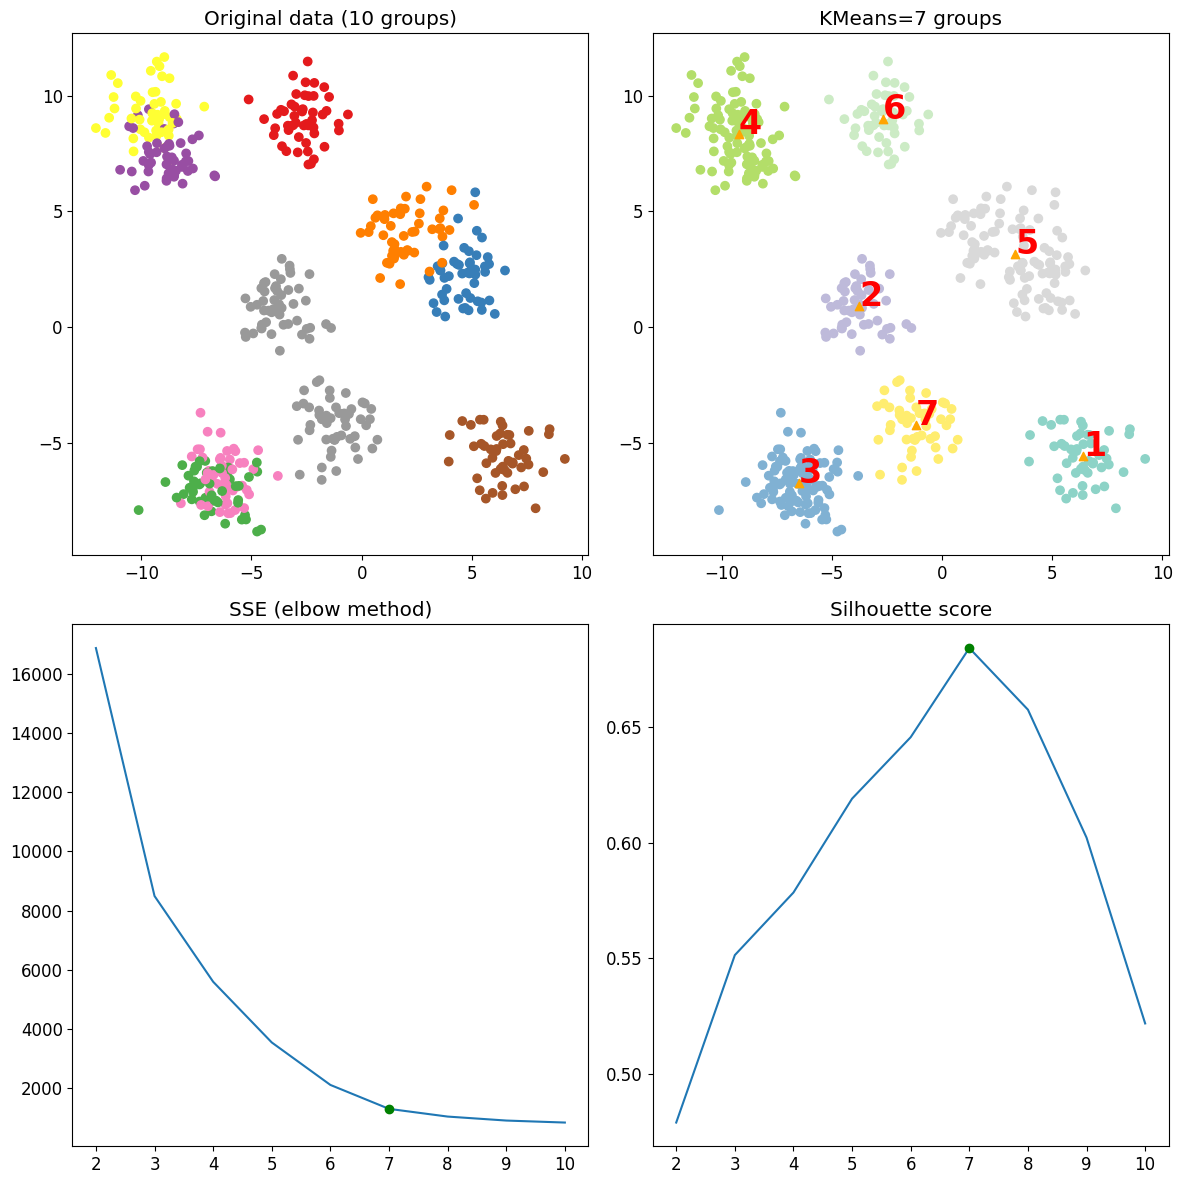

In [ ]:
from sklearn.metrics import silhouette_score

colors = ['red', 'orange', 'yellow', 'green', 'cyan',
          'blue', 'purple', 'brown', 'grey', 'black']
# Number of data groups generated (10)
clusters = 10
# Range of K values (2~10)
k_range = range(2, clusters + 1)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=clusters, random_state=42)

distortions = []
scores = []
# Record the performance of the KMeans model built for each K value
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(dx)
    distortions.append(kmeans.inertia_) # Total point-to-centroid distance
    scores.append(silhouette_score(dx, kmeans.predict(dx))) # Silhouette coefficient

# Find the largest silhouette coefficient to determine the K value
selected_K = scores.index(max(scores)) + 2

# Rebuild the KMeans model and predict target values
kmeans = KMeans(n_clusters=selected_K).fit(dx)
new_dy = kmeans.predict(dx)

# The data center point of the new group
centers = kmeans.cluster_centers_

# Below is for visualization
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.title(f'Original data ({clusters} groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)

plt.subplot(222)
plt.title(f'KMeans={selected_K} groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set3)
plt.scatter(centers.T[0], centers.T[1], marker='^', color='orange')

for i in range(centers.shape[0]):
    plt.text(centers.T[0][i], centers.T[1][i], str(i + 1),
             fontdict={'color': 'red', 'weight': 'bold', 'size': 24})

plt.subplot(223)
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
plt.plot(selected_K, distortions[selected_K - 2], 'go')

plt.subplot(224)
plt.title('Silhouette score')
plt.plot(k_range, scores)
plt.plot(selected_K, scores[selected_K - 2], 'go')
plt.tight_layout()
plt.show()

## Using Clustering for Image Segmentation

In [ ]:
# downloads the ladybug image

import urllib.request
import numpy as np

url = "https://github.com/ageron/handson-ml3/raw/main/images/unsupervised_learning/ladybug.png"
urllib.request.urlretrieve(url, './ladybug')

('./ladybug', <http.client.HTTPMessage at 0x7ea45886a860>)

In [ ]:
import PIL

image = np.asarray(PIL.Image.open('ladybug'))
image.shape

(533, 800, 3)

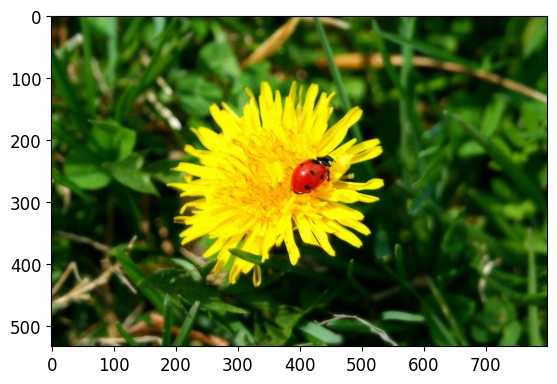

In [ ]:
plt.imshow(image)

In [ ]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[250.80339083 238.65268971   6.56603259]
 [  5.83448628  28.22616668   1.47552886]
 [ 55.88206518  98.62346563  14.79208777]
 [193.20797818  54.13433345  11.37470167]
 [ 25.47759236  64.83281062   4.31953567]
 [156.22887957 160.67579389  98.81396046]
 [ 94.89017515 133.51803159  40.11328915]
 [225.57151644 185.02493849   8.77650414]]
[1 1 1 ... 4 1 1]


In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # Replace original pixel values ​​with their corresponding cluster center coordinates
segmented_img

array([[ 5.83448628, 28.22616668,  1.47552886],
       [ 5.83448628, 28.22616668,  1.47552886],
       [ 5.83448628, 28.22616668,  1.47552886],
       ...,
       [25.47759236, 64.83281062,  4.31953567],
       [ 5.83448628, 28.22616668,  1.47552886],
       [ 5.83448628, 28.22616668,  1.47552886]])

In [ ]:
segmented_img = segmented_img.reshape(image.shape)

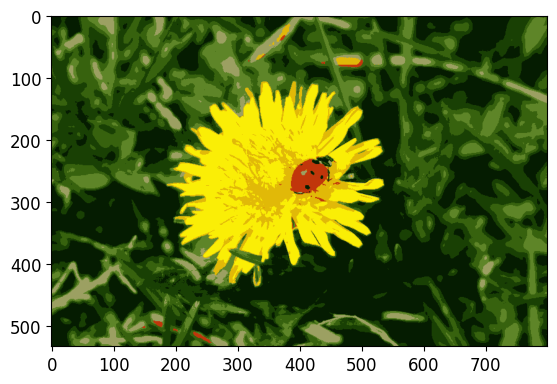

In [ ]:
plt.imshow(segmented_img / 255)

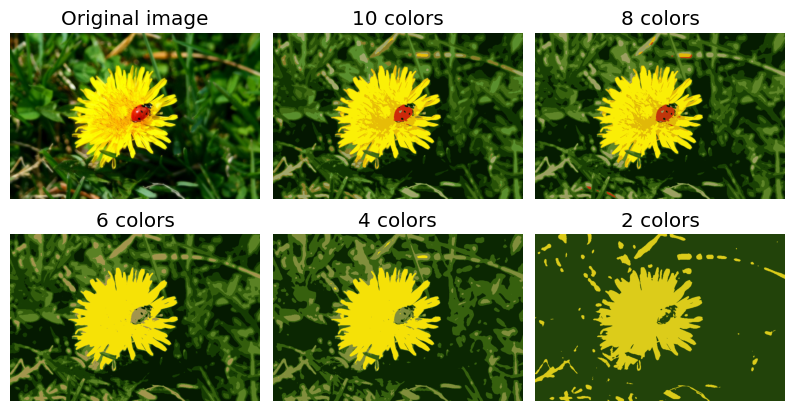

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2) # Number of segment colors
for n_clusters in n_colors:
    kmeans = KMeans(n_init = 'auto', n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [ ]:
# measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # The distance between each data point to other centroids
representative_digit_idx = X_digits_dist.argmin(axis=0) # The indices of data points closest to each cluster center
X_representative_digits = X_train[representative_digit_idx]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now let's plot these representative images and label them manually:

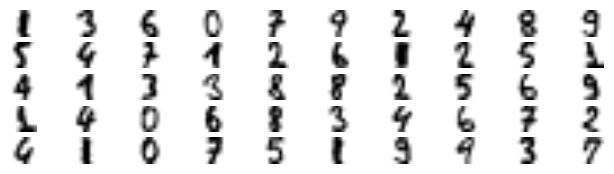

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

We jumped from 74.8% accuracy to 84.9%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]  # new y = the assigned cluster

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.8967254408060453

We got another significant accuracy boost! Let's see if we can do even better by ignoring the 1% instances that are farthest from their cluster center: this should eliminate some outliers:

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] # the distances between data points and their closest centroid
for i in range(k):  # for each cluster
    in_cluster = (kmeans.labels_ == i)  # get the instances in this cluster
    cluster_dist = X_cluster_dist[in_cluster] # get the distances between them and the centroid
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # get the threshold for the shortest 99% distance
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

Wow, another accuracy boost! We have even slightly surpassed the performance we got by training on the fully labeled training set!

Our propagated labels are actually pretty good: their accuracy is about 97.6%:

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

# Assignement - Cluster the Olivetti Faces Dataset

*Exercise 1: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

*Run the following codes to split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set.*

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


*Exercise 2:To speed things up, reduce the data's dimensionality using PCA (maintain 99% variance). Then, transform the training, validation, and test data. Note that 'fit' is only performed for training data. How many features are kept?*

*Exercise 3: Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter) (hint: try different K between 80 and 140).*

*Exercise 4: Create a K-means model using the optimal K and name it to 'best_model'. Then, fit it to the training data*

Run the following codes to visualize the clusters: do you see similar faces in each cluster?

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Output hidden; open in https://colab.research.google.com to view.